In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
dataset = pd.read_csv('Consumo_cerveja.csv',decimal = ',')

In [3]:
dataset = dataset.rename(columns = {'Data':'Date', 'Temperatura Media (C)': 'Medium Temp', 'Temperatura Minima (C)': 'Minimum Temp',
                           'Temperatura Maxima (C)' : 'Maximum Temp', 'Precipitacao (mm)': 'Precipitation (mm)', 
                          'Final de Semana' : 'End of Week', 'Consumo de cerveja (litros)' : 'Beer Consumption (ltrs)'})

In [4]:
df = dataset.drop('Date', 1)

In [5]:
df.head()

,Medium Temp,Minimum Temp,Maximum Temp,Precipitation (mm),End of Week,Beer Consumption (ltrs)
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.9


In [55]:
#dataset['Medium Temp'] = dataset['Medium Temp'].replace(',', '.')

In [56]:
#dataset['Minimum Temp'] = dataset['Minimum Temp'].replace(',', '.')

In [57]:
#dataset['Maximum Temp'] = dataset['Maximum Temp'].replace(',', '.')

In [62]:
#dataset['Precipitation (mm)'] = dataset['Precipitation (mm)'].replace(',', '.')

In [6]:
X = df.iloc[:, :-1].values
print(X)

[[27.3  23.9  32.5   0.    0.  ]
 [27.02 24.5  33.5   0.    0.  ]
 [24.82 22.4  29.9   0.    1.  ]
 ...
 [21.68 20.3  24.1  10.3   0.  ]
 [21.38 19.3  22.4   6.3   0.  ]
 [24.76 20.2  29.    0.    0.  ]]


In [7]:
y = df.iloc[:, -1].values
print(y)

['25.461' '28.972' '30.814' '29.799' '28.9' '28.218' '29.732' '28.397'
 '24.886' '37.937' '36.254' '25.743' '26.99' '31.825' '25.724' '29.938'
 '37.69' '30.524' '29.265' '35.127' '29.13' '25.795' '21.784' '28.348'
 '31.088' '21.52' '29.972' '22.603' '22.696' '26.845' '27.03' '32.057'
 '24.097' '31.655' '24.738' '19.95' '22.821' '28.893' '29.926' '24.062'
 '21.137' '26.805' '26.389' '24.219' '30.231' '24.968' '25.343' '17.399'
 '21.392' '22.922' '24.567' '30.943' '30.825' '25.692' '26.959' '25.366'
 '22.784' '26.241' '26.467' '27.475' '28.749' '24.146' '22.988' '30.3'
 '22.654' '29.09' '24.619' '20.016' '23.042' '22.933' '22.409' '21.281'
 '28.844' '32.872' '20.903' '26.275' '20.167' '23.628' '24.213' '28.631'
 '25.855' '21.406' '21.617' '22.401' '27.989' '24.974' '29.76' '26.116'
 '25.85' '24.925' '21.979' '22.116' '24.867' '33.45' '32.713' '22.356'
 '21.004' '23.362' '20.298' '24.862' '30.505' '25.07' '22.62' '22.001'
 '23.469' '21.735' '21.593' '33.822' '28.028' '24.304' '31.108' '19

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
ypred = regressor.predict(X_test)

In [11]:
print(np.concatenate((ypred.reshape(len(ypred), 1),y_test.reshape(len(y_test),1)), 1))
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), (y_test.reshape(len(y_test),1)), 1))

[[22.39403444045288 '21.593']
 [28.327747618019476 '33.93']
 [28.96398876288502 '24.968']
 [25.504075659721977 '29.972']
 [24.847390150338466 '24.213']
 [31.453900676993328 '29.188']
 [24.770659551327228 '21.979']
 [27.44086875090205 '28.61']
 [19.81742831378971 '22.217']
 [28.86969751087445 '29.732']
 [21.115762589184698 '17.939']
 [23.367004493480366 '20.429']
 [28.1973837280348 '29.829']
 [25.380978907912894 '26.793']
 [25.378491888949167 '27.582']
 [24.217492863337785 '24.227']
 [20.86999209035237 '23.065']
 [28.66975990511991 '25.07']
 [25.05658038238133 '23.181']
 [23.123915736700255 '20.786']
 [27.780311242564068 '27.25']
 [28.748369553884082 '32.473']
 [28.89813762789172 '27.475']
 [27.76070097749761 '31.139']
 [27.196585076291985 '31.649']
 [20.486010732841503 '21.814']
 [23.8646065211427 '23.042']
 [27.92418402261338 '30.617']
 [25.173299650919603 '24.388']
 [24.787857697646704 '26.691']
 [19.821410763977823 '21.826']
 [23.59210821186686 '22.62']
 [28.085405917746083 '29.938'

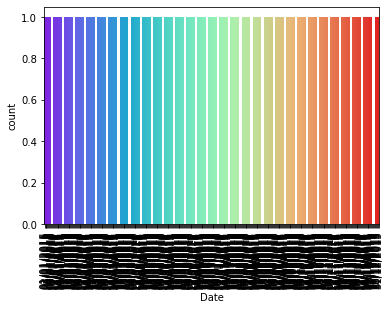

In [12]:
import seaborn as sns
sns.countplot(x = 'Date', data= dataset, palette = 'rainbow')
plt.xticks(rotation = 90)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\ancnd\lib\site-packages\seaborn\distributions.py:305: UserWarning: 

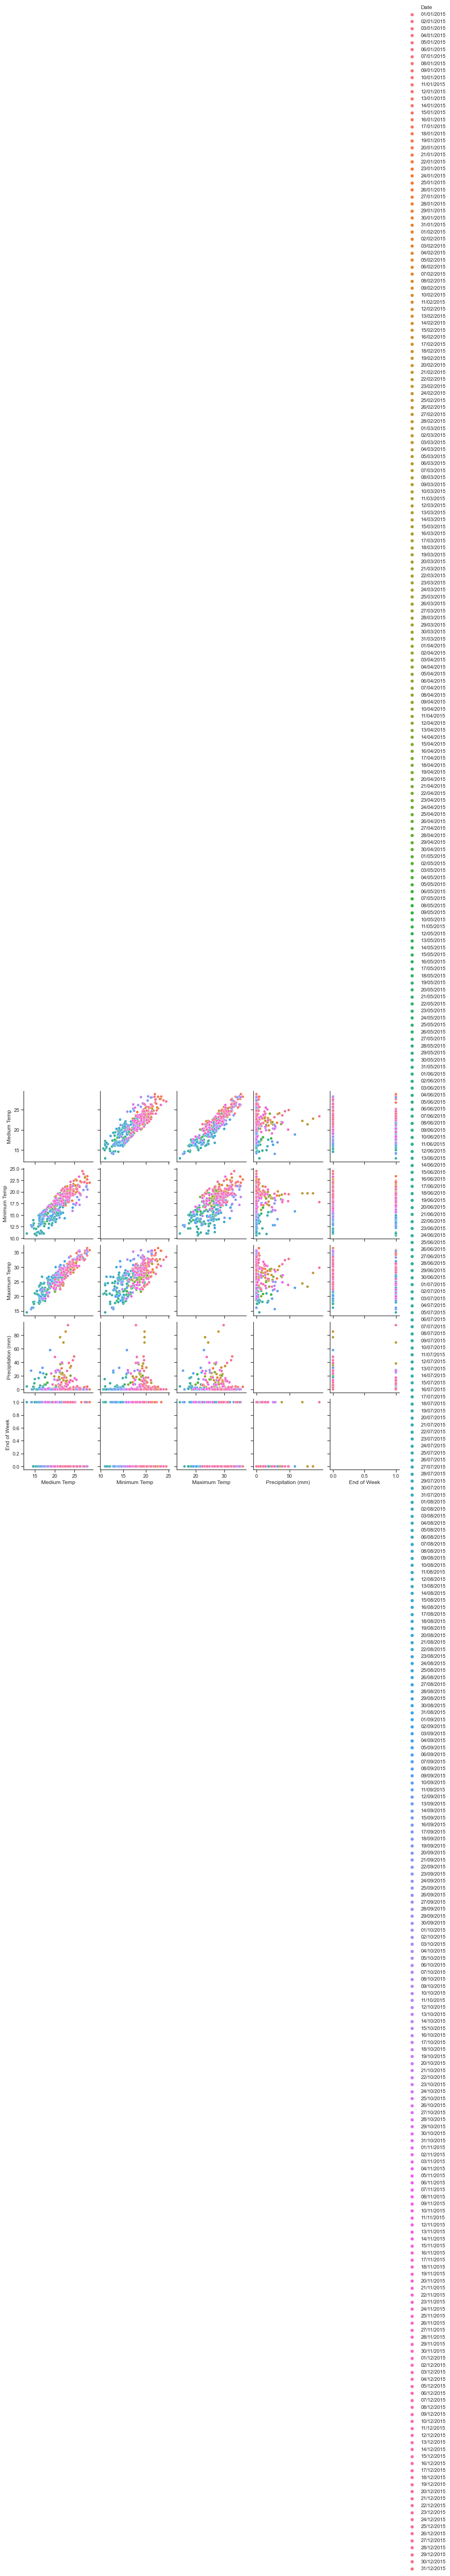

In [13]:
sns.set_theme(style = 'ticks')
sns.pairplot(dataset, hue = 'Date')

In [18]:
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_test, ypred)
print(cm)

6.005974163948885


<AxesSubplot:>

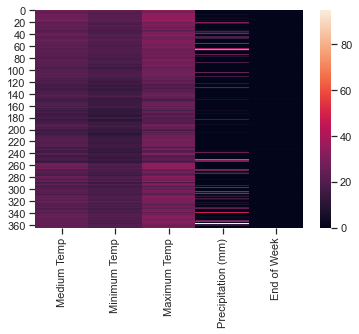

In [28]:
sndf = df.iloc[:, 0:5]
sns.heatmap(sndf)